**GOAL:**
    
    To predict the credit card clients who might default

**Flow:**  
    
- Necesarry steps including creating features
>- Recap from Last used Models
- SVM
>- SVM to select Kernel
>- Hypertuning SVM
- Naive Bayes
- Recap of all the models used till now 
- Ensemble model
>- Maximum Voting
>- Stacking
>- KFold Stacking
- Result after applying different Models

## Below Covered Steps

- Basic Importing of Libraries
- Dividing into Train and Testing Data
- Creating Dummy Variables with new features

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings(action = 'ignore')


df = pd.read_csv("credit.csv")

data = df.copy()

c = {1 :'Graduate School' , 2:'University'  , 3:'High School' , 4:'Others' , 5:'Others', 6:'Others' , 0:'Others'}
df['Education'] = df['EDUCATION'].map(c)

x = {1:1 , 2:2, 3:3 , 0:3}
df["Marriage"] = df["MARRIAGE"].map(x)

df = df.drop(columns=['EDUCATION' , 'MARRIAGE'])


df = pd.get_dummies(data = df, columns=['Marriage'], drop_first=True)

df = pd.get_dummies(data = df, columns=['SEX'], drop_first=True)

df = pd.get_dummies(data = df, columns=['Education'], drop_first=True)

### Train and test data

In [2]:
#seperating independent and dependent variables
x = df.drop(['default payment next month'], axis=1)
y = df['default payment next month']
x.shape, y.shape

from sklearn.model_selection import train_test_split
train , test = train_test_split(df,stratify=y, random_state = 56)

# cols = train_x.columns


#### Shape of Train and Testing data

In [3]:
#seperating independent and dependent variables
train_x = train.drop(['default payment next month'], axis=1)
train_y = train['default payment next month']
print(train_x.shape, train_y.shape)

#seperating independent and dependent variables
test_x = test.drop(['default payment next month'], axis=1)
test_y = test['default payment next month']
print(test_x.shape, test_y.shape)

cols = train_x.columns

(22500, 27) (22500,)
(7500, 27) (7500,)


### New Features

In [4]:
c = {1 :'Graduate School' , 2:'University'  , 3:'High School' , 4:'Others' , 5:'Others', 6:'Others' , 0:'Others'}
data['Education'] = data['EDUCATION'].map(c)

# x = {1:1 , 2:2, 3:3 , 0:3}

In [5]:
#seperating independent and dependent variables
x = data.drop(['default payment next month'], axis=1)
y = data['default payment next month']
x.shape, y.shape


from sklearn.model_selection import train_test_split
train , test = train_test_split(data,stratify=y, random_state = 56)

# cols = train_x.columns
#seperating independent and dependent variables
train_x = train.drop(['default payment next month'], axis=1)
train_y = train['default payment next month']
print(train_x.shape, train_y.shape)

#seperating independent and dependent variables
test_x = test.drop(['default payment next month'], axis=1)
test_y = test['default payment next month']
print(test_x.shape, test_y.shape)

cols = train_x.columns

(22500, 25) (22500,)
(7500, 25) (7500,)


In [6]:
def div(z,x,y):
    try:
        z = x / y
    except ZeroDivisionError:
        z = 0

### Creating New Features on train and test data seperately to avoid Leakage of data

**Binning Age Column**

In [7]:
bins = [19 , 30 , 40 , 50 , 60 , 100]
labels = ["Young" , "Adult" , "Mature" , "Old" , "Very Old"]
train["Age_Bin"] = pd.cut(train['AGE'], bins, labels = labels, include_lowest = True)

train = pd.get_dummies(data = train, columns=['Age_Bin'], drop_first=True)

In [8]:
bins = [19 , 30 , 40 , 50 , 60 , 100]
labels = ["Young" , "Adult" , "Mature" , "Old" , "Very Old"]
test["Age_Bin"] = pd.cut(test['AGE'], bins, labels = labels, include_lowest = True)

test = pd.get_dummies(data = test, columns=['Age_Bin'], drop_first=True)

**Working with credit card payment columns**
- credit card limit 
- months bill 
- months prevous payments 
- how was payment paid (on time or how much late)

In [9]:
train["Pay_Sum"] = train["PAY_0"] + train["PAY_2"] + train["PAY_3"] + train["PAY_4"] + train["PAY_5"] + train["PAY_6"]
train["Bill_Amt_Sum"] = train["BILL_AMT1"] + train["BILL_AMT2"] +train["BILL_AMT3"]+train["BILL_AMT4"]+train["BILL_AMT5"]+train["BILL_AMT6"]
train["Bill_Amt_Avg"] = train["Bill_Amt_Sum"]/6
train["Pay_Amt_Sum"] = train["PAY_AMT1"] + train["PAY_AMT2"] + train["PAY_AMT3"] + train["PAY_AMT4"] + train["PAY_AMT5"] + train["PAY_AMT6"]
train["Pay_Amt_Avg"] = train["Pay_Amt_Sum"]/6
train["Weight_Bill_Avg"] = (train["PAY_0"]*train["BILL_AMT1"] + train["PAY_2"]*train["BILL_AMT2"] + train["PAY_3"]*train["BILL_AMT3"] + train["PAY_4"]*train["BILL_AMT4"] + train["PAY_5"]*train["BILL_AMT5"] + train["PAY_6"]*train["BILL_AMT6"]) / 6
train["Weight_Pay_avg"] = (train["PAY_0"]*train["PAY_AMT1"] + train["PAY_2"]*train["PAY_AMT2"] + train["PAY_3"]*train["PAY_AMT3"] + train["PAY_4"]*train["PAY_AMT4"] + train["PAY_5"]*train["PAY_AMT5"] + train["PAY_6"]*train["PAY_AMT6"] ) / 6
train["Unweight_Bill_Avg"] = (train["Pay_Sum"]*train["Bill_Amt_Sum"])/6
train["Unweight_Pay_Avg"] = (train["Pay_Sum"]*train["Pay_Amt_Sum"])/6
train["lim_Avg"] = (train["Weight_Bill_Avg"]*6 / train["LIMIT_BAL"])*100
train["pay_over_bill"] = 0
div(train["pay_over_bill"] , train["Bill_Amt_Avg"] , train["Pay_Amt_Avg"])

In [10]:
test["Pay_Sum"] = test["PAY_0"] + test["PAY_2"] + test["PAY_3"] + test["PAY_4"] + test["PAY_5"] + test["PAY_6"]
test["Bill_Amt_Sum"] = test["BILL_AMT1"] + test["BILL_AMT2"] +test["BILL_AMT3"]+test["BILL_AMT4"]+test["BILL_AMT5"]+test["BILL_AMT6"]
test["Bill_Amt_Avg"] = test["Bill_Amt_Sum"]/6
test["Pay_Amt_Sum"] = test["PAY_AMT1"] + test["PAY_AMT2"] + test["PAY_AMT3"] + test["PAY_AMT4"] + test["PAY_AMT5"] + test["PAY_AMT6"]
test["Pay_Amt_Avg"] = test["Pay_Amt_Sum"]/6
test["Weight_Bill_Avg"] = (test["PAY_0"]*test["BILL_AMT1"] + test["PAY_2"]*test["BILL_AMT2"] + test["PAY_3"]*test["BILL_AMT3"] + test["PAY_4"]*test["BILL_AMT4"] + test["PAY_5"]*test["BILL_AMT5"] + test["PAY_6"]*test["BILL_AMT6"]) / 6
test["Weight_Pay_avg"] = (test["PAY_0"]*test["PAY_AMT1"] + test["PAY_2"]*test["PAY_AMT2"] + test["PAY_3"]*test["PAY_AMT3"] + test["PAY_4"]*test["PAY_AMT4"] + test["PAY_5"]*test["PAY_AMT5"] + test["PAY_6"]*test["PAY_AMT6"] ) / 6
test["Unweight_Bill_Avg"] = (test["Pay_Sum"]*test["Bill_Amt_Sum"])/6
test["Unweight_Pay_Avg"] = (test["Pay_Sum"]*test["Pay_Amt_Sum"])/6
test["lim_Avg"] = (test["Weight_Bill_Avg"]*6 / test["LIMIT_BAL"])*100
test["pay_over_bill"] = 0
div(test["pay_over_bill"]  , test["Bill_Amt_Avg"] , test["Pay_Amt_Avg"]) 

**New Features on basis of :**
- Relating sex and age 
- relating marriage and age
- relating Sex and marriage
- relating credit limit , bill amount and previous payment at once

In [11]:
def corr_2_cols(Col1, Col2):
    res = pd.crosstab(train[Col1],train[Col2])
    # res = df1.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

train['AgeBin'] = pd.cut(train['AGE'], 6, labels = [1,2,3,4,5,6])
#because 1 2 3 ecc are "categories" so far and we need numbers
train['AgeBin'] = pd.to_numeric(train['AgeBin'])
train.loc[(train['AgeBin'] == 6) , 'AgeBin'] = 5


train['SE_AG'] = 0 #creating a column in terms of sex and age
train.loc[((train.SEX == 1) & (train.AgeBin == 1)) , 'SE_AG'] = 1 #man in 20's
train.loc[((train.SEX == 1) & (train.AgeBin == 2)) , 'SE_AG'] = 2 #man in 30's
train.loc[((train.SEX == 1) & (train.AgeBin == 3)) , 'SE_AG'] = 3 #man in 40's
train.loc[((train.SEX == 1) & (train.AgeBin == 4)) , 'SE_AG'] = 4 #man in 50's
train.loc[((train.SEX == 1) & (train.AgeBin == 5)) , 'SE_AG'] = 5 #man in 60's and above
train.loc[((train.SEX == 2) & (train.AgeBin == 1)) , 'SE_AG'] = 6 #woman in 20's
train.loc[((train.SEX == 2) & (train.AgeBin == 2)) , 'SE_AG'] = 7 #woman in 30's
train.loc[((train.SEX == 2) & (train.AgeBin == 3)) , 'SE_AG'] = 8 #woman in 40's
train.loc[((train.SEX == 2) & (train.AgeBin == 4)) , 'SE_AG'] = 9 #woman in 50's
train.loc[((train.SEX == 2) & (train.AgeBin == 5)) , 'SE_AG'] = 10 #woman in 60's and above
corr_2_cols('SE_AG', 'default payment next month')

train['SE_MA'] = 0
train.loc[((train.SEX == 1) & (train.MARRIAGE == 1)) , 'SE_MA'] = 1 #married man
train.loc[((train.SEX == 1) & (train.MARRIAGE == 2)) , 'SE_MA'] = 2 #single man
train.loc[((train.SEX == 1) & (train.MARRIAGE == 3)) , 'SE_MA'] = 3 #divorced man
train.loc[((train.SEX == 2) & (train.MARRIAGE == 1)) , 'SE_MA'] = 4 #married woman
train.loc[((train.SEX == 2) & (train.MARRIAGE == 2)) , 'SE_MA'] = 5 #single woman
train.loc[((train.SEX == 2) & (train.MARRIAGE == 3)) , 'SE_MA'] = 6 #divorced woman
corr_2_cols('SE_MA', 'default payment next month')

## calculating Average expense from bill amount of previous and this month and the pay amount , dividing by limit balance

train['Avg_exp_5'] = ((train['BILL_AMT5'] - (train['BILL_AMT6'] - train['PAY_AMT5']))) / train['LIMIT_BAL']
train['Avg_exp_4'] = (((train['BILL_AMT5'] - (train['BILL_AMT6'] - train['PAY_AMT5'])) +
                 (train['BILL_AMT4'] - (train['BILL_AMT5'] - train['PAY_AMT4']))) / 2) / train['LIMIT_BAL']
train['Avg_exp_3'] = (((train['BILL_AMT5'] - (train['BILL_AMT6'] - train['PAY_AMT5'])) +
                 (train['BILL_AMT4'] - (train['BILL_AMT5'] - train['PAY_AMT4'])) +
                 (train['BILL_AMT3'] - (train['BILL_AMT4'] - train['PAY_AMT3']))) / 3) / train['LIMIT_BAL']
train['Avg_exp_2'] = (((train['BILL_AMT5'] - (train['BILL_AMT6'] - train['PAY_AMT5'])) +
                 (train['BILL_AMT4'] - (train['BILL_AMT5'] - train['PAY_AMT4'])) +
                 (train['BILL_AMT3'] - (train['BILL_AMT4'] - train['PAY_AMT3'])) +
                 (train['BILL_AMT2'] - (train['BILL_AMT3'] - train['PAY_AMT2']))) / 4) / train['LIMIT_BAL']
train['Avg_exp_1'] = (((train['BILL_AMT5'] - (train['BILL_AMT6'] - train['PAY_AMT5'])) +
                 (train['BILL_AMT4'] - (train['BILL_AMT5'] - train['PAY_AMT4'])) +
                 (train['BILL_AMT3'] - (train['BILL_AMT4'] - train['PAY_AMT3'])) +
                 (train['BILL_AMT2'] - (train['BILL_AMT3'] - train['PAY_AMT2'])) +
                 (train['BILL_AMT1'] - (train['BILL_AMT2'] - train['PAY_AMT1']))) / 5) / train['LIMIT_BAL']


In [12]:
def corr_2_cols(Col1, Col2):
    res = pd.crosstab(test[Col1],test[Col2])
    # res = df1.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

test['AgeBin'] = pd.cut(test['AGE'], 6, labels = [1,2,3,4,5,6])
#because 1 2 3 ecc are "categories" so far and we need numbers
test['AgeBin'] = pd.to_numeric(test['AgeBin'])
test.loc[(test['AgeBin'] == 6) , 'AgeBin'] = 5


test['SE_AG'] = 0 #creating a column in terms of sex and age
test.loc[((test.SEX == 1) & (test.AgeBin == 1)) , 'SE_AG'] = 1 #man in 20's
test.loc[((test.SEX == 1) & (test.AgeBin == 2)) , 'SE_AG'] = 2 #man in 30's
test.loc[((test.SEX == 1) & (test.AgeBin == 3)) , 'SE_AG'] = 3 #man in 40's
test.loc[((test.SEX == 1) & (test.AgeBin == 4)) , 'SE_AG'] = 4 #man in 50's
test.loc[((test.SEX == 1) & (test.AgeBin == 5)) , 'SE_AG'] = 5 #man in 60's and above
test.loc[((test.SEX == 2) & (test.AgeBin == 1)) , 'SE_AG'] = 6 #woman in 20's
test.loc[((test.SEX == 2) & (test.AgeBin == 2)) , 'SE_AG'] = 7 #woman in 30's
test.loc[((test.SEX == 2) & (test.AgeBin == 3)) , 'SE_AG'] = 8 #woman in 40's
test.loc[((test.SEX == 2) & (test.AgeBin == 4)) , 'SE_AG'] = 9 #woman in 50's
test.loc[((test.SEX == 2) & (test.AgeBin == 5)) , 'SE_AG'] = 10 #woman in 60's and above
corr_2_cols('SE_AG', 'default payment next month')

test['SE_MA'] = 0
test.loc[((test.SEX == 1) & (test.MARRIAGE == 1)) , 'SE_MA'] = 1 #married man
test.loc[((test.SEX == 1) & (test.MARRIAGE == 2)) , 'SE_MA'] = 2 #single man
test.loc[((test.SEX == 1) & (test.MARRIAGE == 3)) , 'SE_MA'] = 3 #divorced man
test.loc[((test.SEX == 2) & (test.MARRIAGE == 1)) , 'SE_MA'] = 4 #married woman
test.loc[((test.SEX == 2) & (test.MARRIAGE == 2)) , 'SE_MA'] = 5 #single woman
test.loc[((test.SEX == 2) & (test.MARRIAGE == 3)) , 'SE_MA'] = 6 #divorced woman
corr_2_cols('SE_MA', 'default payment next month')

## calculating Average expense from bill amount of previous and this month and the pay amount , dividing by limit balance

test['Avg_exp_5'] = ((test['BILL_AMT5'] - (test['BILL_AMT6'] - test['PAY_AMT5']))) / test['LIMIT_BAL']
test['Avg_exp_4'] = (((test['BILL_AMT5'] - (test['BILL_AMT6'] - test['PAY_AMT5'])) +
                 (test['BILL_AMT4'] - (test['BILL_AMT5'] - test['PAY_AMT4']))) / 2) / test['LIMIT_BAL']
test['Avg_exp_3'] = (((test['BILL_AMT5'] - (test['BILL_AMT6'] - test['PAY_AMT5'])) +
                 (test['BILL_AMT4'] - (test['BILL_AMT5'] - test['PAY_AMT4'])) +
                 (test['BILL_AMT3'] - (test['BILL_AMT4'] - test['PAY_AMT3']))) / 3) / test['LIMIT_BAL']
test['Avg_exp_2'] = (((test['BILL_AMT5'] - (test['BILL_AMT6'] - test['PAY_AMT5'])) +
                 (test['BILL_AMT4'] - (test['BILL_AMT5'] - test['PAY_AMT4'])) +
                 (test['BILL_AMT3'] - (test['BILL_AMT4'] - test['PAY_AMT3'])) +
                 (test['BILL_AMT2'] - (test['BILL_AMT3'] - test['PAY_AMT2']))) / 4) / test['LIMIT_BAL']
test['Avg_exp_1'] = (((test['BILL_AMT5'] - (test['BILL_AMT6'] - test['PAY_AMT5'])) +
                 (test['BILL_AMT4'] - (test['BILL_AMT5'] - test['PAY_AMT4'])) +
                 (test['BILL_AMT3'] - (test['BILL_AMT4'] - test['PAY_AMT3'])) +
                 (test['BILL_AMT2'] - (test['BILL_AMT3'] - test['PAY_AMT2'])) +
                 (test['BILL_AMT1'] - (test['BILL_AMT2'] - test['PAY_AMT1']))) / 5) / test['LIMIT_BAL']


### Total Features : 57

- Making dummies of necessary features
- Splitting data as train_x and train_y and same for test

In [13]:
train = pd.get_dummies(data = train, columns=['SEX'], drop_first=True)

In [14]:
train = pd.get_dummies(data = train, columns=['EDUCATION'], drop_first=True)
train = pd.get_dummies(data = train, columns=['Education'], drop_first=True)
train = pd.get_dummies(data = train, columns=['MARRIAGE'], drop_first=True)

In [15]:
test = pd.get_dummies(data = test, columns=['SEX'], drop_first=True)
test = pd.get_dummies(data = test, columns=['EDUCATION'], drop_first=True)
test = pd.get_dummies(data = test, columns=['Education'], drop_first=True)
test = pd.get_dummies(data = test, columns=['MARRIAGE'], drop_first=True)

In [16]:
#seperating independent and dependent variables
train_x = train.drop(['default payment next month'], axis=1)
train_y = train['default payment next month']
print(train_x.shape, train_y.shape)

#seperating independent and dependent variables
test_x = test.drop(['default payment next month'], axis=1)
test_y = test['default payment next month']
print(test_x.shape, test_y.shape)

cols2 = train_x.columns

(22500, 57) (22500,)
(7500, 57) (7500,)


## Recap from last used models

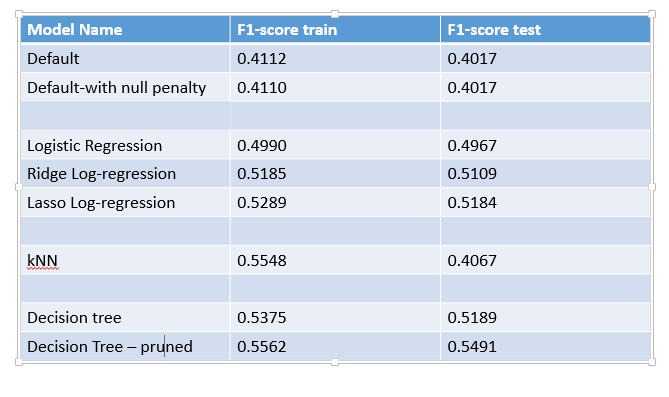

### Applying SVM and Naive Bayes 

**Support Vector Machine**

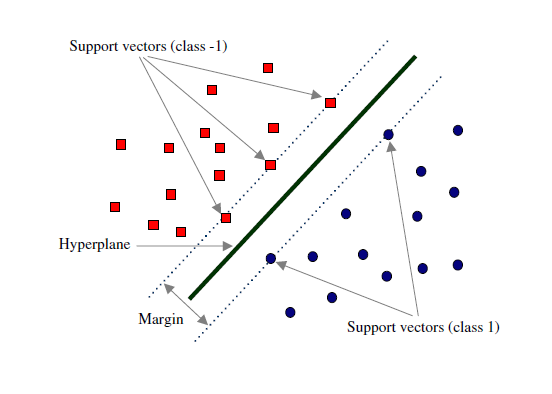

In [21]:
from sklearn.metrics import f1_score
from sklearn.svm import SVC

#### Selecting Kernel

* **SVM1 with linear hyperplane**

In [32]:
svc = SVC(kernel='linear')

In [34]:
svc.fit(train_x, train_y)
train_predict = svc.predict(train_x)
score1 = f1_score(train_predict, train_y)
score1

0.28298638284551575

* **SVM2 with polynomial degree 3 hyperplane**

In [37]:
svc = SVC(kernel='poly')

svc.fit(train_x, train_y)
train_predict = svc.predict(train_x)

from sklearn.metrics import f1_score

score1 = f1_score(train_predict, train_y)
score1

0.41132019558453103

* **SVM3 with rbf**

In [39]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')

svc.fit(train_x, train_y)
train_predict = svc.predict(train_x)

from sklearn.metrics import f1_score

score1 = f1_score(train_predict, train_y)
score1

0.4810978070765505

* **SVM4 with sigmoid function**

In [66]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid')

svc.fit(x_train, y_train)
train_predict = svc.predict(train_x)

from sklearn.metrics import f1_score

score1 = f1_score(train_predict, y_train)
score1

0.40753471744809566

**Result : SVM with poly and rbf gave better results out of all**

### Hypertuning for poly

In [40]:
from sklearn.model_selection import GridSearchCV
classifier = SVC()

# Set of parameters we want to try for out Model
parameters = { 'C' : [0.1, 1, 10],
               'kernel'   : ['poly'] , 'degree' : [3,5,7,8,10]}

#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters , scoring = 'f1', cv = 3, verbose = 2, n_jobs = -1)
grid_scores = grid_search.fit(train_x , train_y)
print( grid_search.best_score_)
print(grid_search.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 33.4min finished


0.41908780683791963
{'C': 10, 'degree': 3, 'kernel': 'poly'}


* Selected Parameter : {'C': 10, 'degree': 3, 'kernel': 'poly'}

* **Running svm with selected parameters**

In [42]:
from sklearn.svm import SVC
svc = SVC(C= 10, degree= 3, kernel= 'poly')

svc.fit(train_x, train_y)
train_predict = svc.predict(train_x)
test_predict = svc.predict(test_x)
from sklearn.metrics import f1_score

score1 = f1_score(train_predict, train_y)
score2 = f1_score(test_predict, test_y)
score1 , score2

(0.5397795191924559, 0.42180660565061684)

**Tuning SVM with c , Gamma , degree , gamma for poly kernel**
* if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

* if ‘auto’, uses 1 / n_features.

In [26]:
from sklearn.model_selection import GridSearchCV
classifier = SVC()

# Set of parameters we want to try for out Model
parameters = { 'C' : [0.1, 1, 10], 'gamma':['scale' , 'auto'],
               'kernel'   : ['poly'] , 'degree' : [3,5,7]}

#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters , scoring = 'f1', cv = 3, verbose = 2, n_jobs = -1)
grid_scores = grid_search.fit(train_x , train_y)
print( grid_search.best_score_)
print(grid_search.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 24.4min finished


0.41908780683791963
{'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


* Selected parameters : {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}

In [28]:
from sklearn.svm import SVC
svc = SVC(C= 10, degree= 3, gamma = 'scale' , kernel= 'poly')

svc.fit(train_x, train_y)
train_predict = svc.predict(train_x)
test_predict = svc.predict(test_x)
from sklearn.metrics import f1_score

score1 = f1_score(train_predict, train_y)
score2 = f1_score(test_predict, test_y)
score1 , score2

(0.5397795191924559, 0.42180660565061684)

**No change on assuming Gamma for tuning**

### Hyperparametr Tuning SVM with kernel being RBF
* Tuning for gamma - scale / auto and c values
* Tuning on gamma - float values and c values

**1. Gamma - scale/auto**

In [22]:
from sklearn.model_selection import GridSearchCV
classifier = SVC()

# Set of parameters we want to try for out Model
parameters = { 'C' : [0.1, 1, 10 , 100], 'gamma':['auto' , 'scale'],
               'kernel' : ['rbf']}

#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters , scoring = 'f1', cv = 3, verbose = 2, n_jobs = -1)
grid_scores = grid_search.fit(train_x , train_y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 10.6min finished


In [23]:
print( grid_search.best_score_)
print(grid_search.best_params_)

0.44262002043494086
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


* Selected parameters : {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [24]:
from sklearn.svm import SVC
svc = SVC(C= 1, gamma='scale', kernel= 'rbf')

svc.fit(train_x, train_y)
train_predict = svc.predict(train_x)
test_predict = svc.predict(test_x)
from sklearn.metrics import f1_score

score1 = f1_score(train_predict, train_y)
score2 = f1_score(test_predict, test_y)
score1 , score2

(0.4810978070765505, 0.4377049180327869)

**2. Gamma - float**

In [43]:
from sklearn.model_selection import GridSearchCV
classifier = SVC()

# Set of parameters we want to try for out Model
parameters = { 'C' : [0.1, 1, 10 , 100], 'gamma':[0.01,0.1,1.0,5.0],
               'kernel' : ['rbf']}

#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters , scoring = 'f1', cv = 3, verbose = 2, n_jobs = -1)
grid_scores = grid_search.fit(train_x , train_y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 35.6min finished


In [44]:
print( grid_search.best_score_)
print(grid_search.best_params_)

0.45065092757781705
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


* Selected Paraeters : {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

**Running svm with selected values**

In [45]:
from sklearn.svm import SVC
svc = SVC(C= 10, gamma=0.01, kernel= 'rbf')

svc.fit(train_x, train_y)
train_predict = svc.predict(train_x)
test_predict = svc.predict(test_x)
from sklearn.metrics import f1_score

score1 = f1_score(train_predict, train_y)
score2 = f1_score(test_predict, test_y)
score1 , score2

(0.507868765004001, 0.43685726038667216)

#### Result : SVM with rbf and parameter {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} gives best results

## Naive bayes

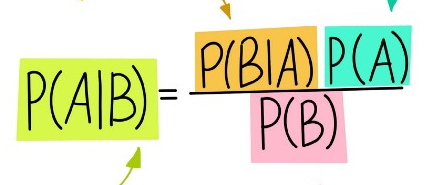

**Gaussian Naive Bayes**

In [17]:
from sklearn.metrics import f1_score

In [18]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

In [19]:
#train the model and make predictions
naive_bayes.fit(train_x, train_y)
train_predict = naive_bayes.predict(train_x)
test_predict = naive_bayes.predict(test_x)
train_score = f1_score( train_predict, train_y)
test_score = f1_score(test_predict , test_y)

In [22]:
train_score , test_score

(0.40133387409310084, 0.39815192281559997)

* **Result : Not good results**

## Summary of All the models applied till now

In [6]:
train_score = [0.510815 , 0.515445 ,  0.511256 ,  0.401334 , 0.537511]

In [7]:
test_score = [0.501526  ,0.414152  ,0.435357,0.398152  ,0.518957]

In [9]:
dataframe = pd.DataFrame({       'Train_Score'        : train_score,
                          'Test_Score'              : test_score,
                          'Algorithm'       : ['Logistic Regression','KNN','SVM','Naive Bayes','Decision Tree']})
print(dataframe)

   Train_Score  Test_Score            Algorithm
0     0.510815    0.501526  Logistic Regression
1     0.515445    0.414152                  KNN
2     0.511256    0.435357                  SVM
3     0.401334    0.398152          Naive Bayes
4     0.537511    0.518957        Decision Tree


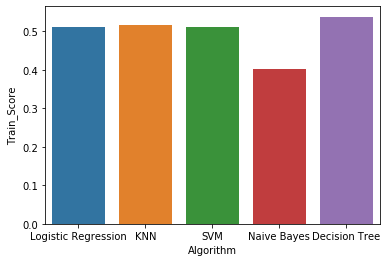

In [13]:
sns.barplot('Algorithm','Train_Score', data = dataframe)

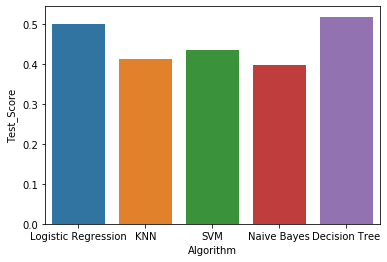

In [11]:
sns.barplot('Algorithm','Test_Score', data = dataframe)

**Conclusion : Tuned decision Tree , Logistic Regression , SVm anf KNN works best in ascending order of test score**

* BUT : 

In [58]:
df = pd.DataFrame({       
                          'Train_Time'      : train_time,
                          'Prediction_time' : prediction_time,
                          'Train_Score'        : score_train,
                          'Test_Score'              : score_test,
                          'Algorithm'       : ['Logistic Regression','KNN','SVM','Naive Bayes','Decision Tree']})
print(df)

   Train_Time  Prediction_time  Train_Score  Test_Score            Algorithm
0    2.722048         0.024004     0.510815    0.501526  Logistic Regression
1    1.093443       106.632552     0.496501    0.385795                  KNN
2   98.721477        33.229148     0.511256    0.435357                  SVM
3    0.117428         0.118930     0.401334    0.398152          Naive Bayes
4    0.649897         0.064771     0.537511    0.518957        Decision Tree


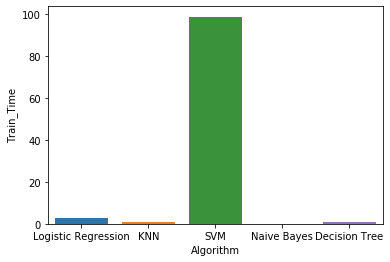

In [55]:
sns.barplot('Algorithm','Train_Time', data = df)

* Result - **Training Time is highest for SVM so chossing LR , Decision Tree and KNN for Ensemble Base Models**

## Ensemble techniques

* Reasons for using Ensemble Techniques : 
    * Better Accuracy (Low error)
    * Higher Consistency (Avoids Overfitting)
    * Redues Bias and Variance Error

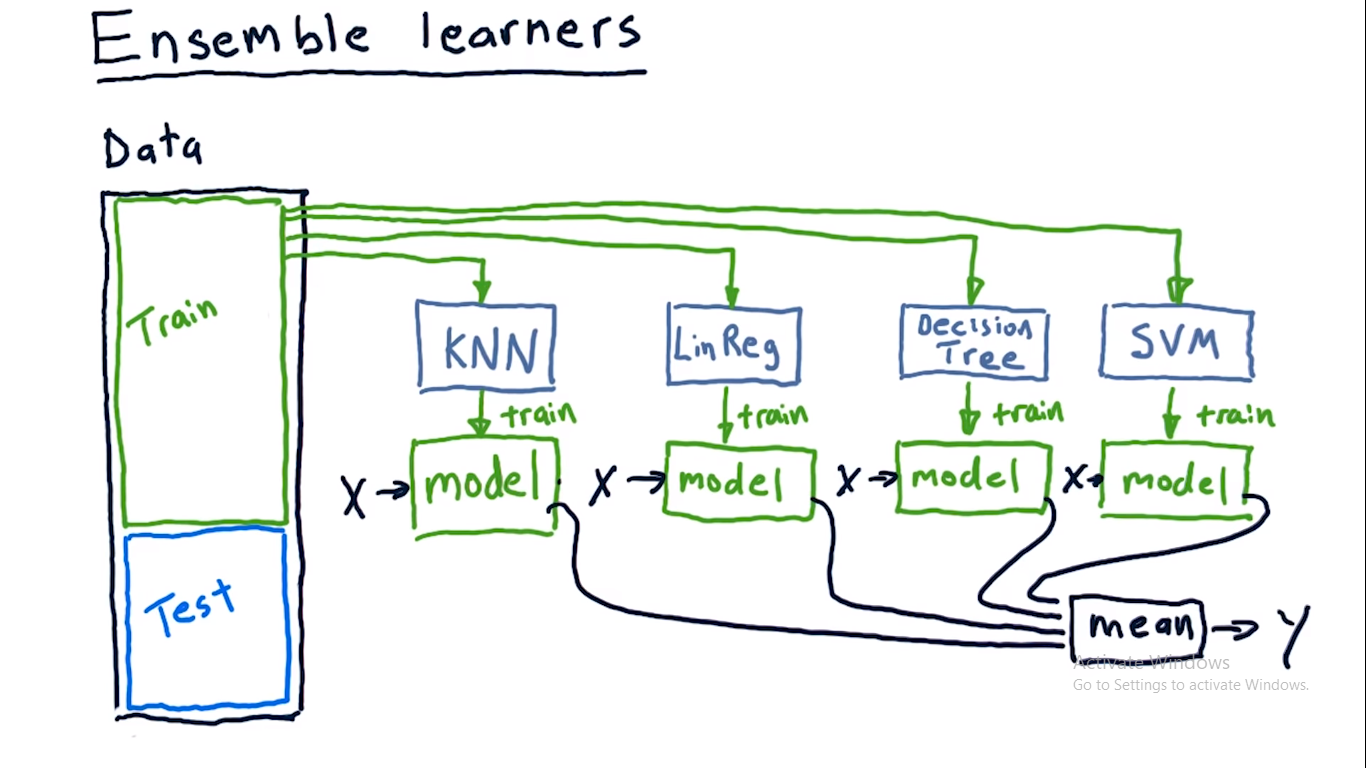

#### !. Ensemble - Max Voting :Mean for linear Regression and mode for Logisitc Regression

In [18]:
#Running Logistic model on training set
model1 = LogisticRegression(penalty='l1' , class_weight='balanced', solver='liblinear')
model1.fit(train_x,train_y)
pred1=model1.predict(test_x)
pred1[:10], f1_score(pred1, test_y)

(array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64), 0.501525940996948)

In [19]:
# Running Decision tree 
model2 = DecisionTreeClassifier(class_weight = 'balanced' , min_samples_leaf = 337 , min_samples_split = 506 , max_depth = 6 , random_state=10)
model2.fit(train_x,train_y)
pred2=model2.predict(test_x)
pred2[:10], f1_score(pred2,test_y)

(array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64), 0.5189567087926862)

In [22]:
# KNN model
model4 = KNeighborsClassifier(n_neighbors=7)
model4.fit(train_x,train_y)
pred4=model4.predict(test_x)
pred4[:10], f1_score(pred4,test_y)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), 0.41415270018621975)

**Finding maximum of all predictions by using mode**

In [23]:

from statistics import mode
final_pred = np.array([])
for i in range(0,len(test_x)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))
final_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [24]:
f1_score(test_y, final_pred)

0.5230851347744863

In [25]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(test_x)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred4[i]]))
final_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [26]:
f1_score(test_y, final_pred)

0.5228908724445723

**Results : Best Results till now**

### 2.Ensemble technique -- Stacking

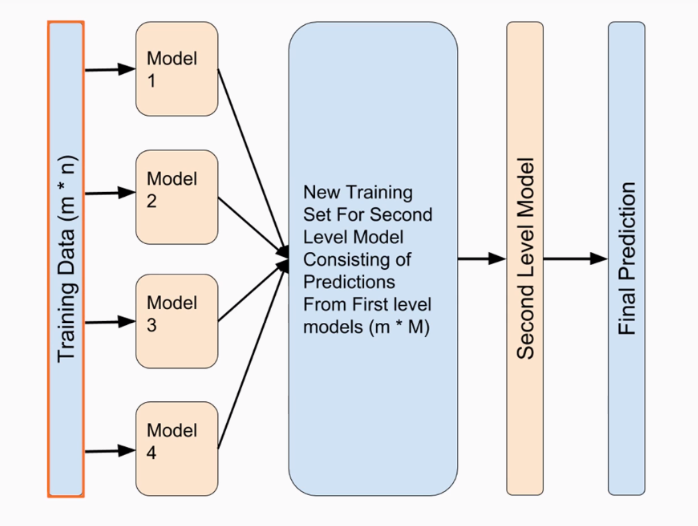

### Model Training and Predictions 

In [19]:
def model_predictions(model, train_x, train_y, test_x):
    
    #train the model
    model.fit(train_x,train_y)
    train_pred=model.predict(train_x)
    test_pred = model.predict(test_x)
    #score on the training data
    train_score=f1_score(train_pred,train_y)
    print('Training Score:', train_score)
    test_score=f1_score(test_pred,test_y)
    print('Testing Score:', test_score)
    #storing predictions for train and test
    return train_pred, test_pred

In [20]:
# Base Model 1 - Logistic Regression
LR=LogisticRegression(penalty='l1' , class_weight='balanced', solver='liblinear')
M1_train, M1_test = model_predictions(LR, train_x, train_y, test_x)

Training Score: 0.510941475826972
Testing Score: 0.50139842359522


In [21]:
#Base Model 2 - Decision Tree
DT=DecisionTreeClassifier(class_weight = 'balanced' , min_samples_leaf = 337 , min_samples_split = 506 , max_depth = 6 , random_state=10)
M2_train, M2_test = model_predictions(DT, train_x, train_y, test_x)

Training Score: 0.5375110326566636
Testing Score: 0.5189567087926862


In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X=train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [25]:
# Base Model 3 - k Nearest Neighbour
knn=KNeighborsClassifier(n_neighbors=7)
M3_train, M3_test = model_predictions(knn, train_x, train_y, test_x)

Training Score: 0.49650072626436026
Testing Score: 0.3857949959644875


In [25]:
# New train dataframe (from base models)
train_prediction = {
              'LR': M1_train,
              'DT': M2_train,
              'knn': M3_train
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

,LR,DT,knn
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [26]:
train_predictions.tail()

,LR,DT,knn
22495,0,0,0
22496,0,1,0
22497,0,0,0
22498,0,0,0
22499,1,0,0


In [27]:
#New test dataframe (from base models)
test_prediction = {
              'LR': M1_test,
              'DT': M2_test,
              'knn': M3_test
              }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

,LR,DT,knn
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [28]:
test_predictions.tail()

,LR,DT,knn
7495,0,0,1
7496,0,0,0
7497,0,0,0
7498,1,1,1
7499,0,0,0


**Using New train and New test data to test**

In [31]:
# Stacker model_1
model_1 = LogisticRegression()
model_1.fit(train_predictions, train_y)
predict1 = model_1.predict(train_predictions)
predict2 = model_1.predict(test_predictions)
new_score_train = f1_score(predict1,train_y)
new_score_test = f1_score(predict2,test_y)
new_score_train , new_score_test

(0.4814016172506739, 0.38556193601312555)

In [32]:
# Stacker model_2
model_2 = DecisionTreeClassifier()
model_2.fit(train_predictions, train_y)
predict1 = model_2.predict(train_predictions)
predict2 = model_2.predict(test_predictions)
new_score_train = f1_score(predict1,train_y)
new_score_test = f1_score(predict2,test_y)
new_score_train , new_score_test


(0.49650072626436026, 0.3857949959644875)

In [30]:
# Stacker model_3
model_3 = KNeighborsClassifier()
model_3.fit(train_predictions, train_y)
predict1 = model_3.predict(train_predictions)
predict2 = model_3.predict(test_predictions)
new_score_train = f1_score(predict1,train_y)
new_score_test = f1_score(predict2,test_y)
new_score_train , new_score_test

(0.5514537107880644, 0.5196250732278852)

**Tuning Stacker-model 3 -- KNN which has given best results so far**

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier as KNN

score = cross_val_score( KNN(n_neighbors = 4),X = train_predictions, y = train_y ,scoring="f1", cv = 5 , n_jobs=-1)
score

array([0.48143713, 0.47926267, 0.55185538, 0.49565798, 0.50909091])

In [47]:
# Consistency using Mean and standard deviation in percentage
score.mean()*100, score.std()*100

(50.346081322298865, 2.6477192616490832)

#### Checking optimum value for Neighbor

In [48]:
def Val_score(n_neighbors):
   
    avg = []
    std = []
  
    for i in n_neighbors:
      score = cross_val_score(KNN(n_neighbors = i) , X = train_predictions, y = train_y,scoring="f1", cv = 7 , n_jobs=-1)
      
    # adding mean to avg list
      avg.append(score.mean())
      
    # adding standard deviation to std list
      std.append(score.std())
      
    return avg, std

In [49]:
n_neighbors = range(1,20)
mean, std = Val_score(n_neighbors) 

Text(0.5, 1.0, 'Mean Validation score')

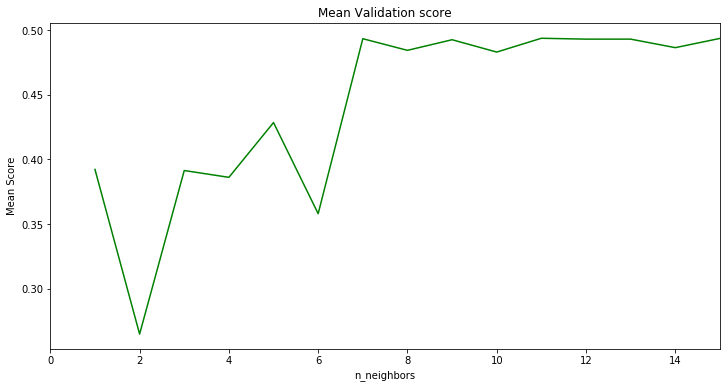

In [50]:
plt.figure(figsize=(12,6))
plt.plot(n_neighbors, mean, color = 'green', label = 'mean_train' )
# plt.plot(n_neighbors, mean1, color = 'red', label = 'mean_val' )
plt.xlabel('n_neighbors')
plt.xlim(0,15)
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

#### Good neighbor values are 7 ,9 , 11 from looking at the graph

Text(0.5, 1.0, 'Standard Deviation of Validation score')

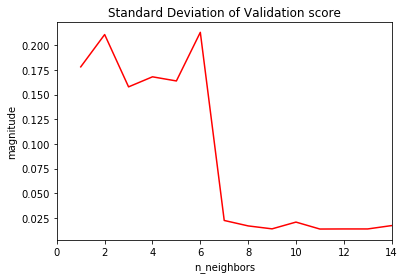

In [51]:
plt.plot(n_neighbors, std, color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.xlim(0,14)
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

##### Since we have lowest std deviation at 11

- Checking model neighbor at 11

In [53]:
### Trying the optimal model over test set
clf = KNN(n_neighbors = 11)
clf.fit(train_predictions, train_y)
train_pred = clf.predict(train_predictions)
score1 = f1_score(train_pred, train_y)
test_pred = clf.predict(test_predictions)
score2 = f1_score(test_pred, test_y)
score1 , score2

(0.5537142857142857, 0.5198135198135198)

#### No point in doing so , so stick to meta model and do not tune

### Variants of Stacking -- (Kfold)

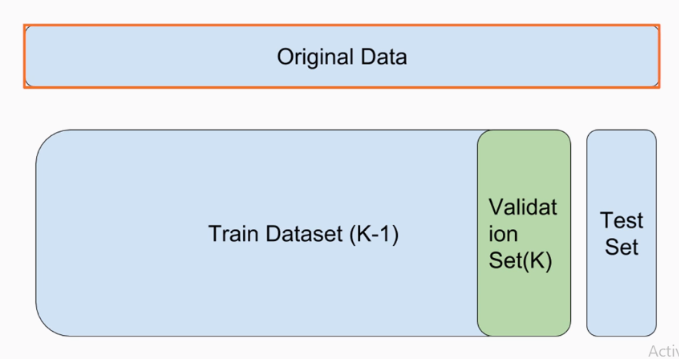


* We split the training data into K-Folds just like K-Fold cross validation
* A base model is fitted on the K-1 parts and predictions are made for the Kth part
* We do this for each part of the training data
* The base model is then fitted on the whole train dataset to calculate it performance on the test set
* We repeat these steps For other base models
* Predictions from train set are used as features for second level model
* Second level model is used to make predictions in the test set

In [54]:

#seperating independent and dependent variables
train_x = train.drop(['default payment next month'], axis=1)
train_y = train['default payment next month']
print(train_x.shape, train_y.shape)

#seperating independent and dependent variables
test_x = test.drop(['default payment next month'], axis=1)
test_y = test['default payment next month']
print(test_x.shape, test_y.shape)

(22500, 57) (22500,)
(7500, 57) (7500,)


#### Function that gives kfold predictions

In [55]:
from sklearn.model_selection import KFold

def kfold_predictions( model , n_splits , train_x , train_y, test_x ):
    ## Initializing empty Numpy Arrays
    train_pred = np.empty((0,0) , int)
    skfold = KFold(n_splits, random_state = 9)
  
    #For every permutation of KFold
    for i,j in skfold.split(train_x, train_y):
        x_train, x_test = train_x.iloc[i], train_x.iloc[j]
        y_train, y_test = train_y.iloc[i], train_y.iloc[j]
    
        #Train a model on training set
        model.fit( X = x_train, y = y_train)
    
        #Predict on Chosen Group
        tmp = model.predict(x_test)
    
        #Storing train predictions
        train_pred = np.append(train_pred, tmp)
    
    #Training on complete data and generating Predictions on Test set
    model.fit(train_x, train_y)
    test_pred = model.predict(test_x)
  
    return train_pred, test_pred

**Base Model 1 - Logistic Regression**

In [57]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(penalty='l1' , class_weight='balanced', solver='liblinear')
M1_train, M1_test = kfold_predictions( LR, 10, train_x, train_y, test_x) 
M1_train , M1_test

(array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 1, 0], dtype=int64))

**Base Model 2 - Decision Tree**

In [58]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(class_weight = 'balanced' , min_samples_leaf = 337 , min_samples_split = 506 , max_depth = 6 , random_state=10)
M2_train, M2_test = kfold_predictions(DT, 10, train_x, train_y, test_x) 
M2_train , M2_test

(array([0, 0, 0, ..., 1, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 1, 0], dtype=int64))

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X=train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)
train_x = pd.DataFrame(train_x)
test_x = pd.DataFrame(test_x)

**Base Model 3 - KNN**

In [60]:
# Base K-Neighbors Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
M3_train, M3_test= kfold_predictions( knn, 10, train_x, train_y, test_x) 
M3_train , M3_test

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 1, 0], dtype=int64))

**Arranging Train KFold Predictions**

In [61]:
train_prediction = {
              'LR': M1_train,
              'KNN': M3_train,
              'DT': M2_train
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

,LR,KNN,DT
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


**Arranging test KFold Predictions**

In [62]:

test_prediction = {
              'LR': M1_test,
              'KNN': M3_test,
              'DT': M2_test
              }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

,LR,KNN,DT
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


**Training on Meta Model 1 - KNN**

In [64]:
# Final Model taking the previous predictions as training set
model= KNeighborsClassifier()
model.fit(train_predictions, train_y)
final_train_pred = model.predict(train_predictions)
final_test_pred = model.predict(test_predictions)
train_score = f1_score(final_train_pred , train_y)
test_score = f1_score(final_test_pred ,test_y)
train_score , test_score

(0.5298064767091316, 0.5210432720806164)

**Training on Meta Model -- Logistic Regression**

In [66]:
# Final Model taking the previous predictions as training set
model= LogisticRegression()
model.fit(train_predictions, train_y)
final_train_pred = model.predict(train_predictions)
final_test_pred = model.predict(test_predictions)
train_score = f1_score(final_train_pred , train_y)
test_score = f1_score(final_test_pred ,test_y)
train_score , test_score

(0.38229152164833635, 0.3839137645107794)

**Training on Meta Model - Decision Tree**

In [67]:
# Final Model taking the previous predictions as training set
model= DecisionTreeClassifier()
model.fit(train_predictions, train_y)
final_train_pred = model.predict(train_predictions)
final_test_pred = model.predict(test_predictions)
train_score = f1_score(final_train_pred , train_y)
test_score = f1_score(final_test_pred ,test_y)
train_score , test_score

(0.38229152164833635, 0.3839137645107794)

**Meta Model KNN gave the best results**

In [64]:
# Final Model taking the previous predictions as training set
model= KNeighborsClassifier()
model.fit(train_predictions, train_y)
final_train_pred = model.predict(train_predictions)
final_test_pred = model.predict(test_predictions)
train_score = f1_score(final_train_pred , train_y)
test_score = f1_score(final_test_pred ,test_y)
train_score , test_score

(0.5298064767091316, 0.5210432720806164)

**Conclusion : KFOld Stacking has given the best results**